# Testing Chemistry for molecule environment

TODO:

    - clean data set of invalid smile objects
    
    

In [1]:
# imports crucial to molecule object
import pandas as pd
import os
from rdkit import Chem, DataStructs
import random
from Chemistry import Mol
from rdkit.Chem import Draw
# imports for testing

In [2]:
df = pd.read_csv('MoleculeLibrary.csv')

In [3]:
df.columns

Index(['Unnamed: 0', 'SMILES', 'Compound ID'], dtype='object')

In [4]:
os.path.isfile('./MoleculeLibrary.csv')

True

In [5]:
df[56:113]

,Unnamed: 0,SMILES,Compound ID
56,56,CC1(O)CCC2C3CCC4=CC(=O)CCC4(C)C3CCC21C,17a-Methyltestosterone
57,57,Nc2cccc3nc1ccccc1cc23,1-aminoacridine
58,58,CC(C)CBr,1-Bromo-2-methylpropane
59,59,CCCCBr,1-Bromobutane
60,60,CCCCCCCBr,1-Bromoheptane
61,61,CCCCCCBr,1-Bromohexane
62,62,Brc1cccc2ccccc12,1-Bromonapthalene
63,63,CCCCCCCCBr,1-Bromooctane
64,64,CCCCCBr,1-Bromopentane
65,65,CCCBr,1-Bromopropane


## possible bonding 
    =C
    -C
    [C]
    (C)
    

###  Useful methods 

 m.GetAtomWithIdx(0).GetSymbol()
    'C'
    
 m.GetAtomWithIdx(0).GetExplicitValence()
    2
    
 m.GetBondWithIdx(0).GetBeginAtomIdx()
    0
    
 m.GetBondWithIdx(0).GetEndAtomIdx()
    1
    
 m.GetBondBetweenAtoms(0,1).GetBondType()
rdkit.Chem.rdchem.BondType.SINGLE

## Molecule Class

## Comparing molecules to others


Notes:
    - we should use the comparision for the history as well as to the goal.
    - There must be a limit of history restores before it reverts twice
    - bad actions must somehow be penalized
    - use while loops to test
    - explore adding bonds
    - explore processing the goal
    
    
    
Exploring functional groups
    - (c1ccccc1)
    - 'n1ccc2c1CCCC2'
        
Examples
    -Brc1ccc(Br)cc1
    

In [345]:
# Set mol
moltest = Mol('C1CC1F', 'CCCC' )

In [346]:
# get Random Goal and initial molecule
mol = moltest.GetRandomGoal()
print(mol)

917    p-Bromoacetanilide
Name: Compound ID, dtype: object


In [347]:
print("New goal:         " + moltest.goal + "\n" + "New initial Mol:  " + moltest.mol)

New goal:         CC(=O)Nc1ccc(Br)cc1
New initial Mol:  C1CC1F


In [348]:
# display current atom options 
atoms = moltest.get_Atoms()
print(atoms)
bonds = moltest.get_Bonds()
print(bonds)

['O', 'N', 'Br', 'C']
[1.0, 2.0, 1.5]


In [349]:
mol = moltest.GetMol()
ri = mol.GetRingInfo()
print(ri.AtomRings())

((0, 1, 2),)


Molecule is 2.2857 % similar to the desired state


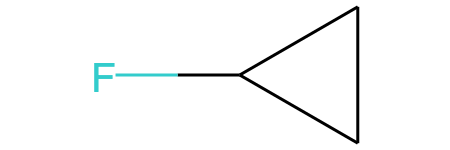

In [350]:
print("Molecule is {} % similar to the desired state".format( moltest.GetSimilarity()))
moltest.GetMol()

In [303]:
elements = Chem.GetPeriodicTable()
def GetValency(element):
    return list(elements.GetValenceList(element))[0]

In [15]:
GetValency("S")

2

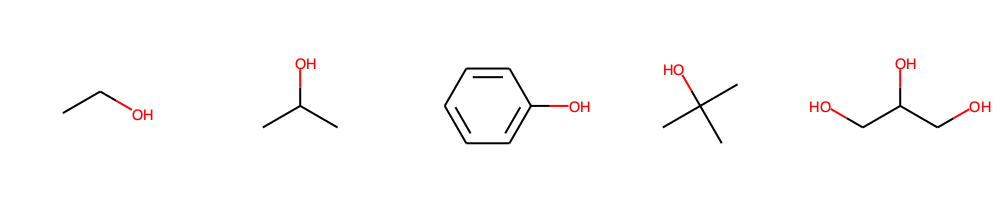

In [49]:
ethanol = Chem.MolFromSmiles('CCO')
isopropanol = Chem.MolFromSmiles('CC(C)O')
phenol = Chem.MolFromSmiles('c1cccc(O)c1')
t_butanol = Chem.MolFromSmiles('C(C)(C)(C)O')
glycerol = Chem.MolFromSmiles('OCC(O)CO')

alcohols = [ethanol, isopropanol, phenol, t_butanol, glycerol]

Draw.MolsToGridImage(alcohols, molsPerRow=5)
